# Lecture 6.4: Regression Diagnostics

## Outline  

* Linearity
* Normality
* Constant variance
* Multicollinearity
* Outliers

## Objectives

* Know how to check if the regression assumptions are met
* Know what to do when the assumptions are not met

## Assumptions for Linear Regression

We **assume** the following model holds,  

$$ y = \beta_0 + \beta_1 x + \varepsilon $$  

$$ \varepsilon \sim N(0, \sigma^2) \quad  \text{independent of } x$$ 

* Linearity: $y$ is a linear function of $x$    

* Normality: the errors ($\varepsilon$) are Normally distributed  

* Constant variance: the errors have the same variance  

* Independent observations: the observations are independent of each other

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yaml

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

cars = pd.read_sql("SELECT * FROM cars WHERE horsepower IS NOT NULL;", engine, index_col='index')

Populating the interactive namespace from numpy and matplotlib


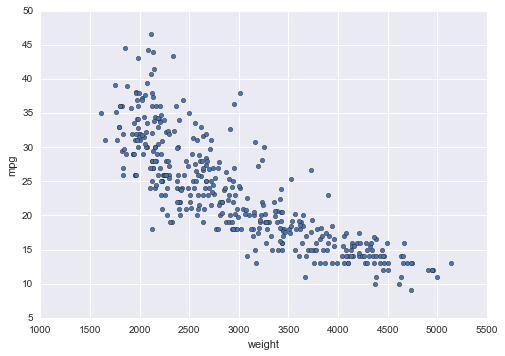

In [2]:
cars.plot('weight', 'mpg', kind='scatter');

We hope (assume) we see a linear pattern and a level of variation about the line.  

Our model is designed to capture these two features of the data.   

In practice we need to check our assumption that the model captures the important features of the data.
* Is the model a good way to describe the data?

## Model Checking

### Why do we have to check our model?

* All estimates, intervals, and hypothesis tests have been developed assuming that the model is correct.  

* If the model is incorrect, then the formulas and methods we use may be incorrect.

### Residuals and Their Plots  

* All of the assumptions of the model are really statements about the regression error terms ($\varepsilon$)  

* How can we test whether the data supports these assumptions if we cannot observe the errors directly?  
    * We use the least squares residuals

$$ e_i = y_i - \hat{y}_i $$  

* Sometimes we use **Standardized  Residuals** for convenience.  

$$ r_i = \frac{e_i}{s_e} \approx \frac{\varepsilon_i}{\sigma} \sim N(0, 1) $$

### Non-Linearity  

A key assumption of linear regression is that $y$ is a linear function of $x$.

To check whether the linearity assumption is met, we look for patterns in the residual plot.  

In [3]:
x = random.uniform(0, 30, 100)
e = random.normal(0, 5, 100)

y = 34 + 4.1 * x + e

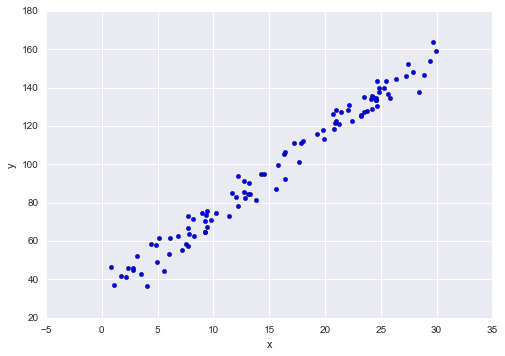

In [4]:
xlabel('x')
ylabel('y')
scatter(x, y);

This looks like the type of data our model is meant to describe.  

In [5]:
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4584.
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           4.27e-84
Time:                        15:27:54   Log-Likelihood:                -304.84
No. Observations:                 100   AIC:                             613.7
Df Residuals:                      98   BIC:                             618.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6197      1.093     29.834      0.000      30.450      34.789
x1             4.1771      0.062     67.702      0.000       4.055       4.300
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.210
Skew:                          -0.324   Prob(JB):                        0.331
Kurtosis:                       2.666   Cond. No.                         37.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

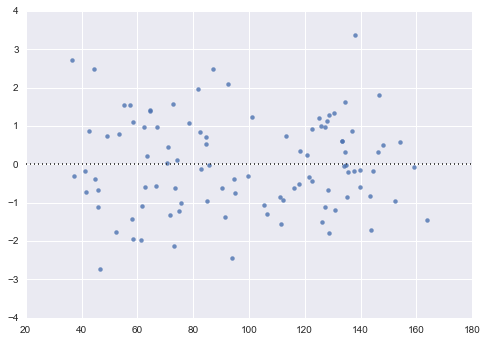

In [6]:
sns.residplot(y, x);

* No obvious pattern  

* Residuals unrelated to $X$    

What happens when this assumptions fails?

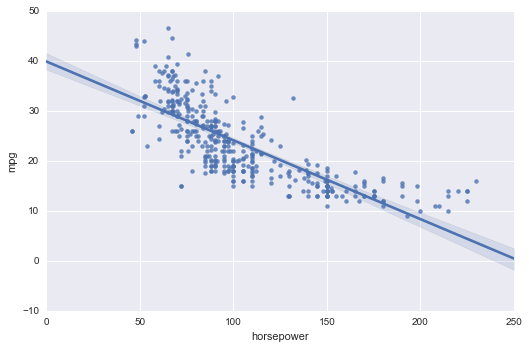

In [7]:
sns.lmplot('horsepower', 'mpg', cars, aspect=1.5);

There is some nonlinearity evident in the plot.

In [8]:
X = cars['horsepower']
X = sm.add_constant(X)
y = cars.mpg

model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           7.03e-81
Time:                        15:27:55   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

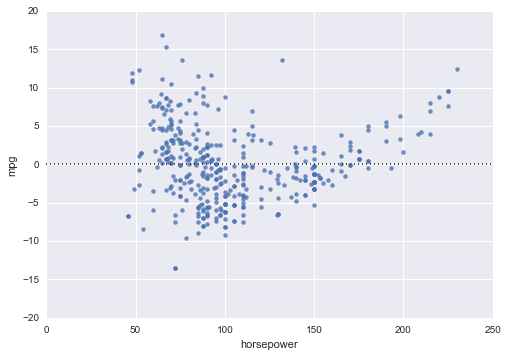

In [9]:
sns.residplot('horsepower', 'mpg', cars);

There should be no relationship between residuals and $X$!!  

The nonlinearity is even more evident in the residual plot.  

How can we fix this?


In [10]:
X2 = X.copy()
X2['horsepower2'] = X2['horsepower']**2

model2 = sm.OLS(y, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           5.40e-99
Time:                        15:27:55   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

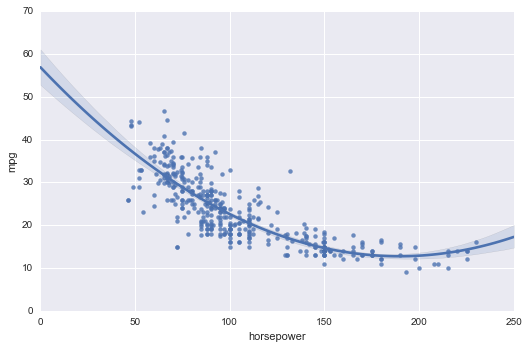

In [11]:
sns.lmplot('horsepower', 'mpg', cars, order=2, aspect=1.5);

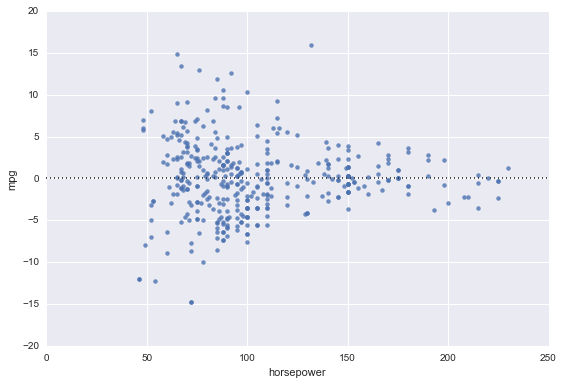

In [12]:
figsize(9, 6)
sns.residplot('horsepower', 'mpg', cars, order=2);

Much better!  

#### Transforming X  

In general, people try  

$$ log(x), \sqrt{x}, 1/x, x^2 $$  

If you have a lot of $x$’s and you try transforming each one, it will take a while.  


We can also try transforming $y$. (But we want to make sure our model is still interpretable.) 

In [13]:
log_y = np.log(y)

model3 = sm.OLS(log_y, X)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     864.7
Date:                Mon, 11 Jul 2016   Prob (F-statistic):          5.39e-101
Time:                        15:27:56   Log-Likelihood:                 96.145
No. Observations:                 392   AIC:                            -188.3
Df Residuals:                     390   BIC:                            -180.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8645      0.028    139.194      0.000       3.810       3.919
horsepower    -0.0073      0.000    -29.405      0.000      -0.008      -0.007
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.454
Skew:                           0.045   Prob(JB):                        0.797
Kurtosis:                       3.141   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

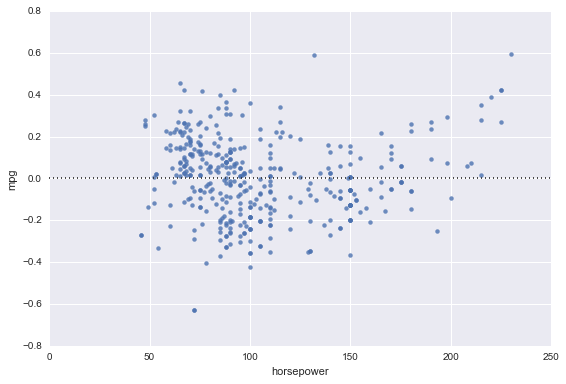

In [14]:
sns.residplot(X.horsepower, log_y);

In [15]:
X4 = X2.copy()

model4 = sm.OLS(log_y, X4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Mon, 11 Jul 2016   Prob (F-statistic):          4.54e-112
Time:                        15:27:56   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4022      0.073     60.639      0.000       4.260       4.545
horsepower     -0.0171      0.001    -13.632      0.000      -0.020      -0.015
horsepower2  3.901e-05   4.92e-06      7.925      0.000    2.93e-05    4.87e-05
==============================================================================
Omnibus:                        9.051   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.714
Skew:                          -0.142   Prob(JB):                      0.00105
Kurtosis:                       3.871   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

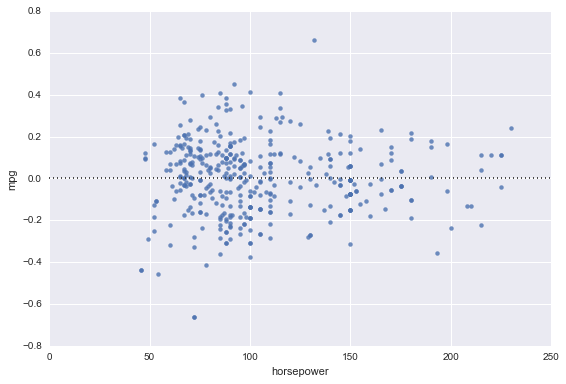

In [16]:
sns.residplot(X.horsepower, log_y, order=2);

Even better!

#### How to find transformations

* Plot $y$ versus each $x$ in the model - see if there is a non-linear relationship  

* Use residual diagnostic plots to help spot ill-fitting models  

* Trial and Error - look at a lot of graphs

### Normality of Error Terms

* A major, big-time assumption is that the errors in our regression model are normally distributed.  

* This assumption lets us construct confidence intervals and do hypothesis tests.  

* It is essential that we always check this assumption.

#### Graphical Methods

* Histogram of residuals

* Normal Q-Q plot

In [17]:
X = cars['horsepower']
X = sm.add_constant(X)
y = cars['mpg']

model1 = sm.OLS(y,X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           7.03e-81
Time:                        15:27:57   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

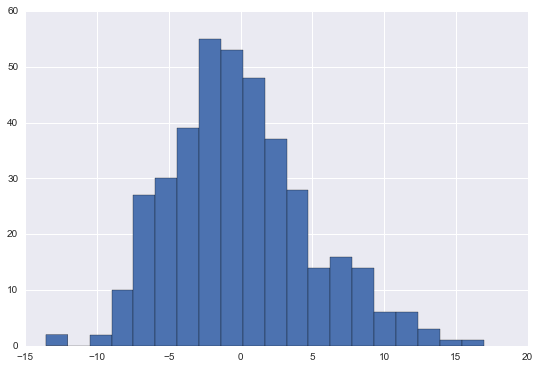

In [18]:
res1 = results1.resid
hist(res1, bins = 20);

**The Q-Q plot**: A quantile-quantile plot of the standardized data against the standard Normal distribution.  

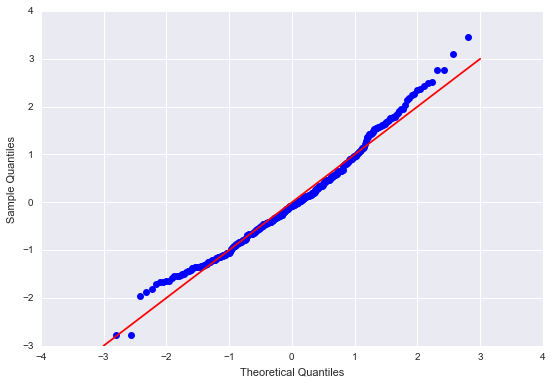

In [19]:
from statsmodels.graphics.gofplots import qqplot

# There are various ways of standardizing the residuals 
# We will use the pearson residuals as the standardized residuals here
sres1 = results1.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

#### Numerical Methods

There are various tests for Normality, e.g. the Shapiro-Wilk test, the Jarque-Bera test, etc.  

$H_0$: data is Normally distributed  

$H_1$: data is not Normally distributed  

A small p-value indicates violation of the Normality assumption.

From the regression output, we have:  

Jarque-Bera (JB):	17.305  
Prob(JB):	0.000175

So the p-value for the Normality test is 0.000175, which shows evidence of non-Normality.

**What if it is not normal?**  

* In cases in which the normality assumption is not met, transforming the dependent variable is often useful.
* In many instances, a log transformation works.

In [20]:
log_y = log(y)

model3 = sm.OLS(log_y, X)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     864.7
Date:                Mon, 11 Jul 2016   Prob (F-statistic):          5.39e-101
Time:                        15:27:57   Log-Likelihood:                 96.145
No. Observations:                 392   AIC:                            -188.3
Df Residuals:                     390   BIC:                            -180.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8645      0.028    139.194      0.000       3.810       3.919
horsepower    -0.0073      0.000    -29.405      0.000      -0.008      -0.007
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.454
Skew:                           0.045   Prob(JB):                        0.797
Kurtosis:                       3.141   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

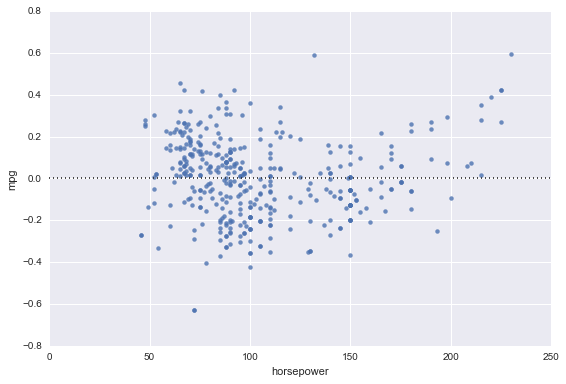

In [21]:
sns.residplot(X.horsepower, log_y);

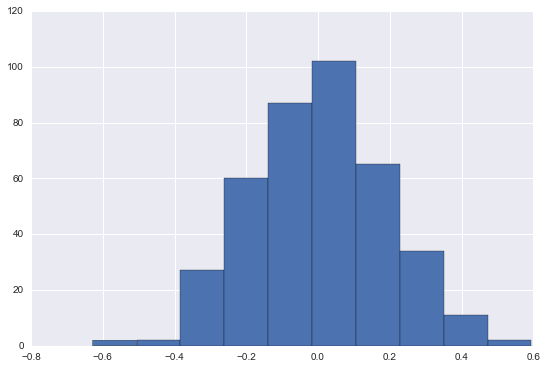

In [22]:
res3 = results3.resid
hist(res3);

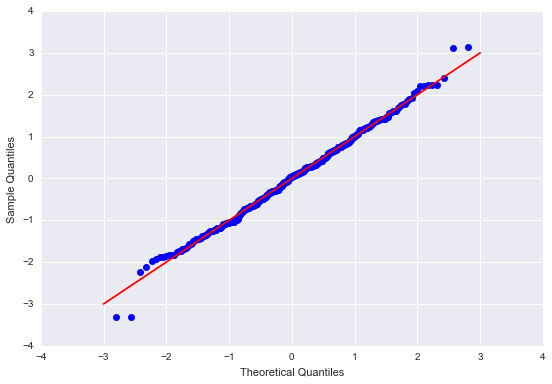

In [23]:
sres3 = results3.resid_pearson
qqplot(sres3)
q = linspace(-3, 3)
plot(q, q, color='r')
show()

### Unequal variance (heteroscedasticity) 

Another of our basic assumptions is that the errors all have the same distribution and in particular, the same variance.

* Heteroskedasticity means the variance of the errors changes.  

* Our model assumes “homoskedasticity”

In [24]:
X = cars['horsepower']
X = sm.add_constant(X)
y = cars.mpg

model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           7.03e-81
Time:                        15:27:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

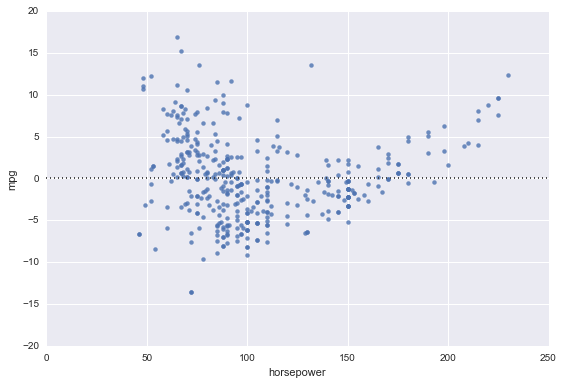

In [25]:
sns.residplot('horsepower', 'mpg', cars);

**Good basic solution for heteroskedasticity**  

* Essentially there is too much variation in the model.That is, there is excess variation in the $y$ variable.  

* An easy way to reduce the variation in $y$ is to take the log of it.

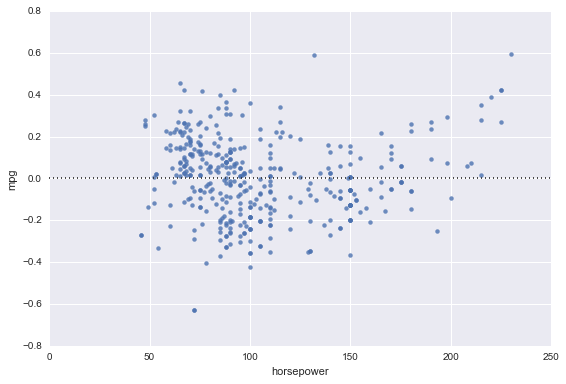

In [26]:
log_y = np.log(y)
model3 = sm.OLS(log_y, X)
results3 = model3.fit()

sns.residplot(X.horsepower, log_y);

#### Testing for Heteroskedasticity  

There are also numerical tests for heteroskedasticity.  

$H_0$: constant variance  

$H_1$: non-constant variance  

A small p-value gives evidence for non-constant variance (heteroskedasticity).

In [27]:
from statsmodels.stats.diagnostic import het_breushpagan

het_breushpagan(results3.resid, results3.model.exog) # the second output gives the p-value of the test

(0.62500686989512744,
 0.42919276413697427,
 0.62281107259724366,
 0.43048408723423626)

### The incredible log transformation

The log transformation is used quite often in regression analysis.  

There are three basic reasons for applying the log transformation:  

* to accommodate non-linearity
* to reduce right skewness in the $y$ (or, equivalently, in the error term)
* to eliminate heteroskedasticity

**Note:**  

* By “logging” your data, you are transforming it to a different scale.  

* The log scale squeezes numbers together, so there is less variation. However, the model becomes slightly different to interpret since the scale of the Y variables changes (e.g. instead of dollars we are modeling “log dollars”)  
    * Slope coefficient: for each unit increase in $x$, we expect $y$ to increase by $e^{\beta_1}$ **time(s)** (in multiplicative terms), holding all other variable(s) constant

### Multicollinearity

* For a regression of $y$ on $k$ explanatory variables $x_1, \dots ,x_k$, it is hoped that the explanatory variables will be highly correlated with the dependent variable. A relation is sought that will explain a large portion of the variation in $y$.  

* At the same time, however, it is not desirable for strong relationships to exist among the explanatory variables.  

* When explanatory variables are correlated with one another, we have the problem of multicollinearity.

The presence of a high degree of **multicollinearity** among the explanatory variables will result in the following problems:  

* The standard deviations of the regression coefficients will be disproportionately large. As a result, the t-statistic will be small. Thus we may think we do not need variables when in fact we do.  

* The regression coefficient estimates will be unstable. Because of the high standard errors, reliable estimates are hard to obtain. Signs of the coefficients may be opposite of what is intuitive reasonable. Dropping one variable from the regression will cause large changes in the estimates of the other variables.  

#### Detecting Multicollinearity  

Compare the pairwise correlations between the explanatory variables.  

One rule of thumb is that multicollinearity may be a serious problem if any pairwise correlation is larger than 0.5.

In [28]:
X5 = cars[['displacement', 'horsepower', 'weight', 'acceleration']]
X5 = sm.add_constant(X5)
y = cars.mpg

model5 = sm.OLS(y,X5)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Mon, 11 Jul 2016   Prob (F-statistic):          9.63e-102
Time:                        15:27:59   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X5.corr()

,const,displacement,horsepower,weight,acceleration
const,NaN,NaN,NaN,NaN,NaN
displacement,NaN,1.000000,0.897257,0.932994,-0.543800
horsepower,NaN,0.897257,1.000000,0.864538,-0.689196
weight,NaN,0.932994,0.864538,1.000000,-0.416839
acceleration,NaN,-0.543800,-0.689196,-0.416839,1.000000


In [30]:
results5.pvalues

const           7.072099e-55
displacement    3.716584e-01
horsepower      8.848982e-03
weight          2.302545e-10
acceleration    8.538765e-01
dtype: float64

**Dealing with Multicollinearity**  


* Throw out some explanatory variables  

* Get more data  

* Step-wise regression

In [31]:
X6 = X5.drop('displacement', axis = 1)

model6 = sm.OLS(y,X6)
results6 = model6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Mon, 11 Jul 2016   Prob (F-statistic):          7.48e-103
Time:                        15:27:59   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.6783      2.409     18.965      0.000      40.943      50.414
horsepower      -0.0475      0.016     -2.970      0.003      -0.079      -0.016
weight          -0.0058      0.001    -10.024      0.000      -0.007      -0.005
acceleration    -0.0021      0.123     -0.017      0.987      -0.245       0.240
==============================================================================
Omnibus:                       35.392   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.071
Skew:                           0.684   Prob(JB):                     9.91e-11
Kurtosis:                       3.975   Cond. No.                     3.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Outliers

* occur when $y_i$ is far away from predicted $\hat{y}_i$  

* Least squares estimates are particularly affected by outliers  

* Residual plots can help identify outliers

#### Different types of outliers  

<img src="images/outliers.png" width="500">  

#### Leverage  

* **Leverage** point: an observation with **an unusual X value**  

* Does not necessarily have a large effect on the regression model  

* Most common measure, the hat value,  

$$h_{ii} = (H)_{ii}$$

* The $i_{th}$ diagonal of the hat matrix 

$$ H = X(X^TX)^{-1}X^T $$

#### Influential Points  

* An outlier that greatly affects the slope of the regression line  

* Observations that have high leverage and large residuals tend to be influential  

<img src="images/inf_points.png" width="500"> 